# 
1. Load the dataset
2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of
number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
3. Using univariate &amp; bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
4. Split the dataset into training and test set in the ratio of 70:30 (Training:Test).
5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)
6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 
8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)



In [3]:
# Numerical libraries
import numpy as np   

from sklearn.model_selection import train_test_split

# Import Linear Regression machine learning library
from sklearn.tree import DecisionTreeRegressor

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 



In [5]:
filename = 'parkinsons2.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(filename, sep=',')
print(df.shape)
#df = pd.read_csv("parkinsons.data")

(195, 23)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [7]:
print(df.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0      119.992       157.302        74.997         0.00784           0.00007   
1      122.400       148.650       113.819         0.00968           0.00008   
2      116.682       131.111       111.555         0.01050           0.00009   
3      116.676       137.871       111.366         0.00997           0.00009   
4      116.014       141.781       110.655         0.01284           0.00011   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)   ...    \
0   0.00370   0.00554     0.01109       0.04374             0.426   ...     
1   0.00465   0.00696     0.01394       0.06134             0.626   ...     
2   0.00544   0.00781     0.01633       0.05233             0.482   ...     
3   0.00502   0.00698     0.01505       0.05492             0.517   ...     
4   0.00655   0.00908     0.01966       0.06425             0.584   ...     

   Shimmer:DDA      NHR     HNR      RPDE       DFA   sp

In [8]:
print(df.tail())

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
190           0.00003   0.00263   0.00259     0.00790       0.04087   
191           0.00003   0.00331   0.00292     0.00994       0.02751   
192           0.00008   0.00624   0.00564     0.01873       0.02308   
193           0.00004   0.00370   0.00390     0.01109       0.02296   
194           0.00003   0.00295   0.00317     0.00885       0.01884   

     MDVP:Shimmer(dB)   ...    Shimmer:DDA      NHR     HNR      RPDE  \
190             0.405   ...        0.07008  0.02764  19.517  0.448439   
191             0.263   ...        0.04812

In [9]:
df.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [21]:
print (df.isnull().values.any())

False


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


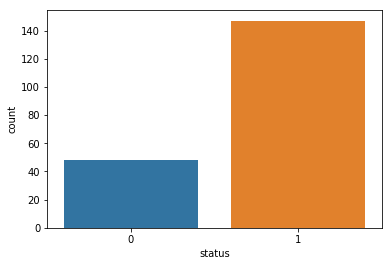

In [12]:
sns.countplot(df.status) # categorical

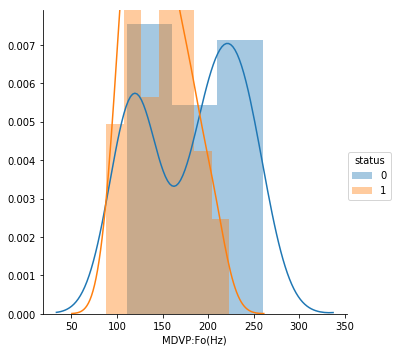

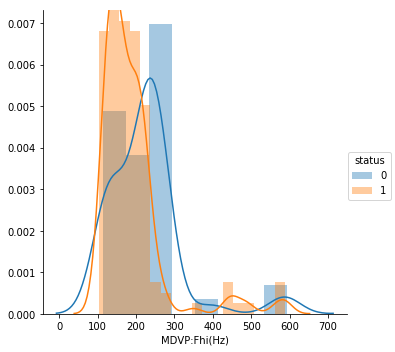

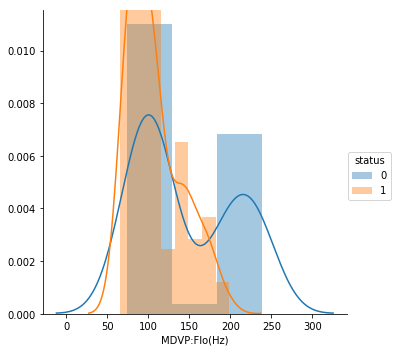

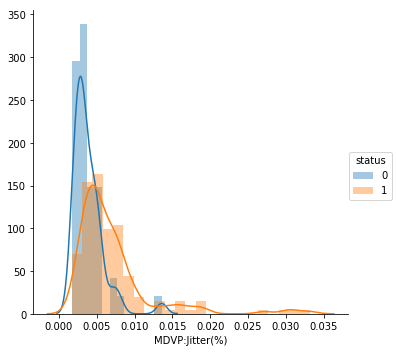

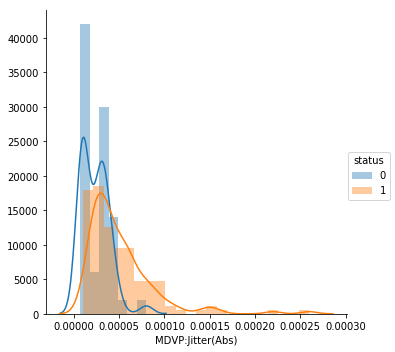

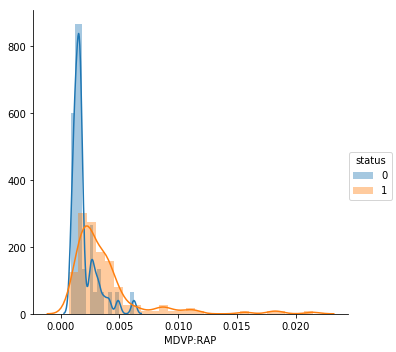

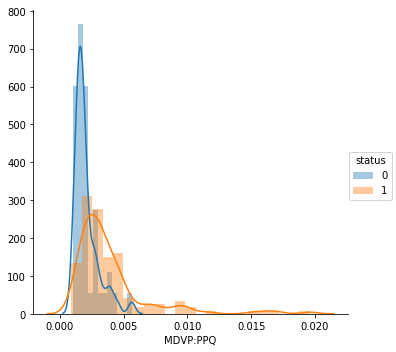

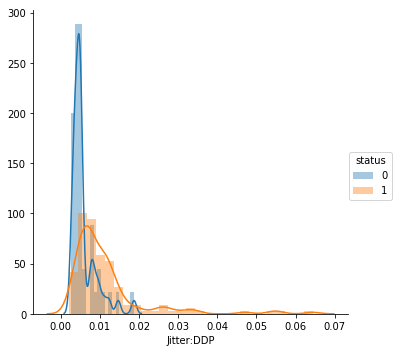

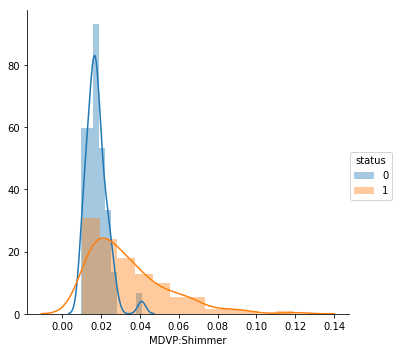

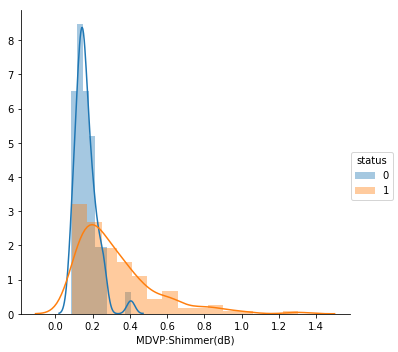

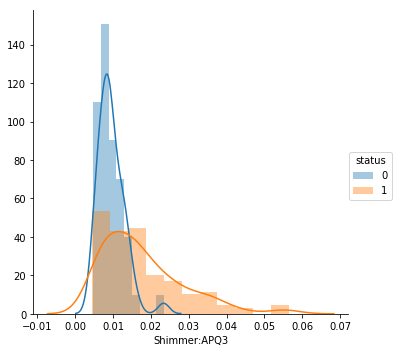

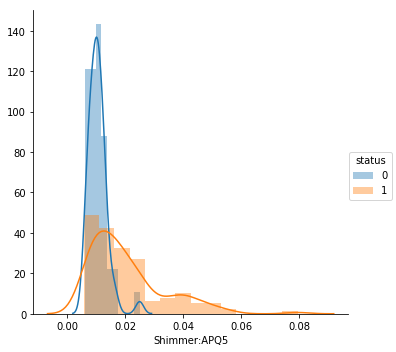

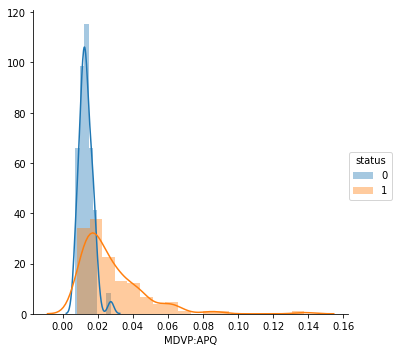

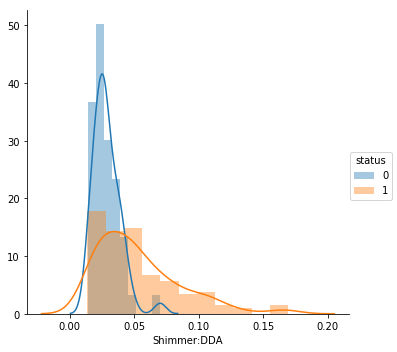

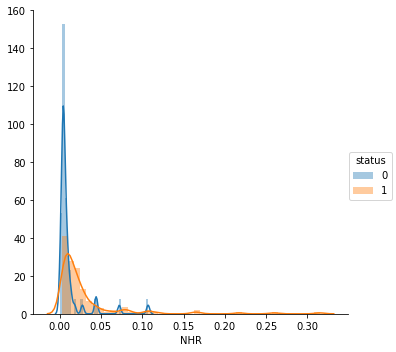

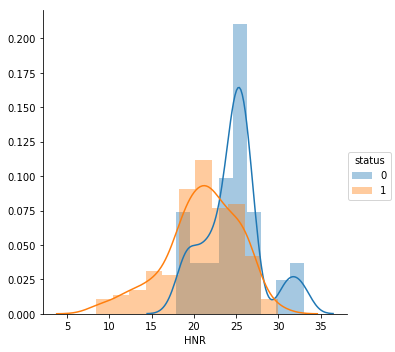

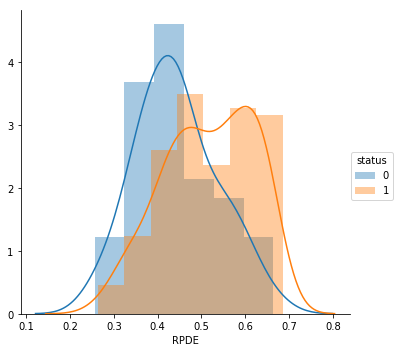

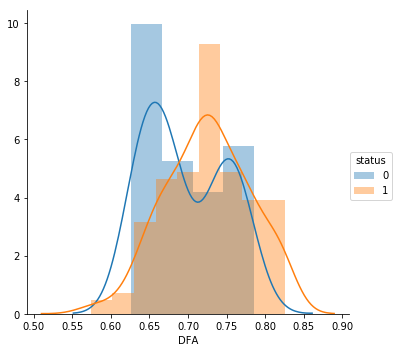

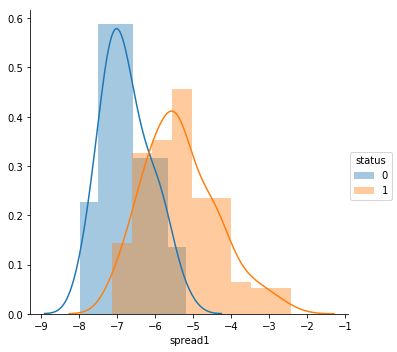

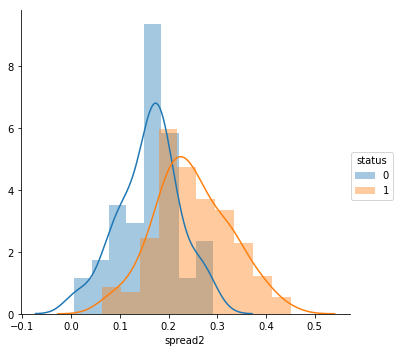

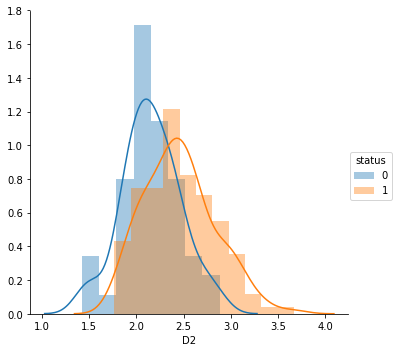

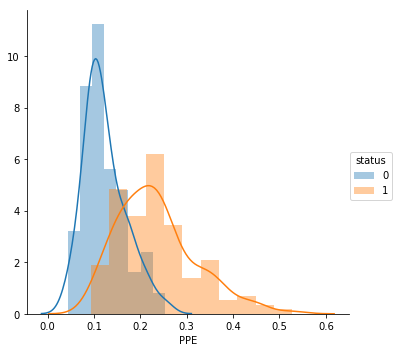

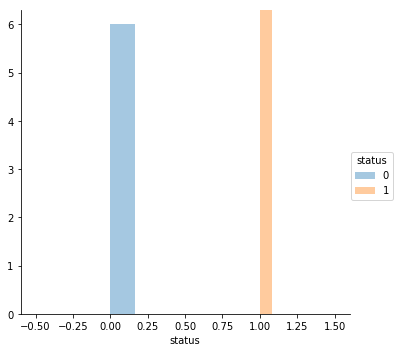

In [13]:
import warnings
warnings.filterwarnings('ignore')
for col in df.columns:
    if(col == 'name'):
        continue
    sns.FacetGrid(df, hue='status', size =5).map(sns.distplot, col).add_legend()

In [14]:
# status distribution
print(df.groupby('status').size())

status
0     48
1    147
dtype: int64


In [15]:
print(df.groupby('status'))

In [16]:
## Target Variable Frequency Distribution
freq = df['status'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)

   status  count      prop
0       1    147  0.753846
1       0     48  0.246154


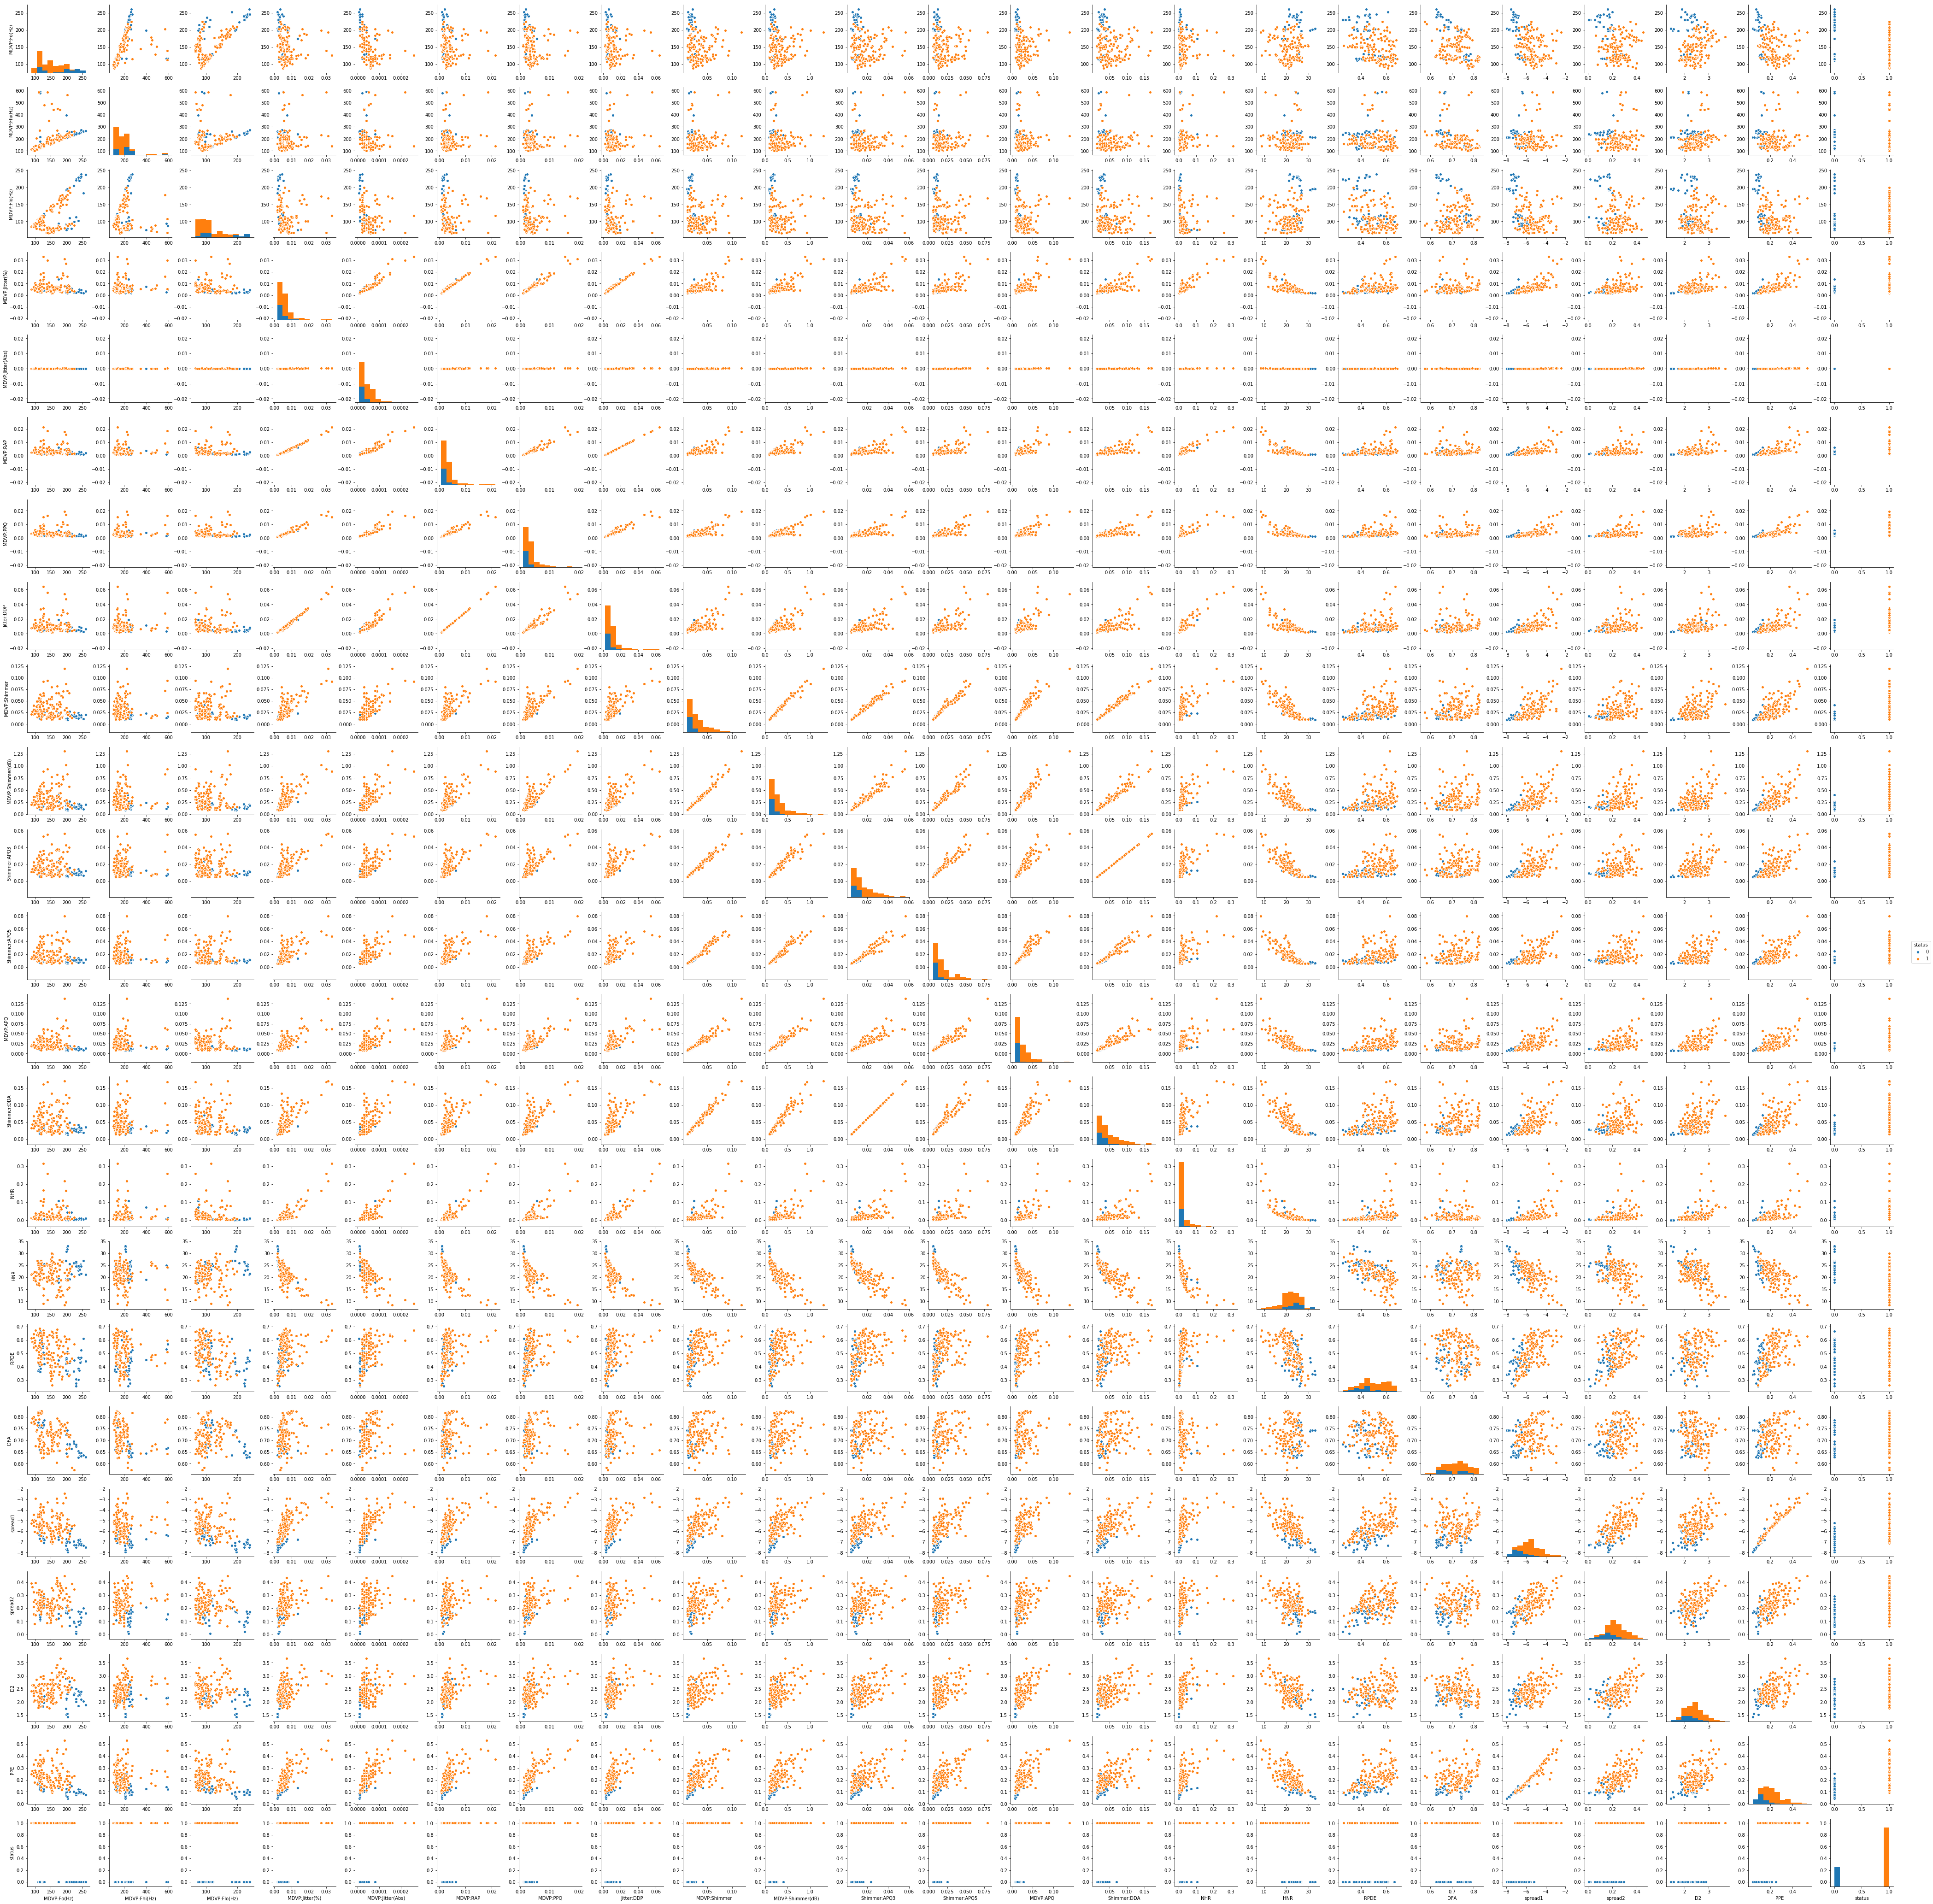

In [17]:
sns.pairplot(df,hue="status")

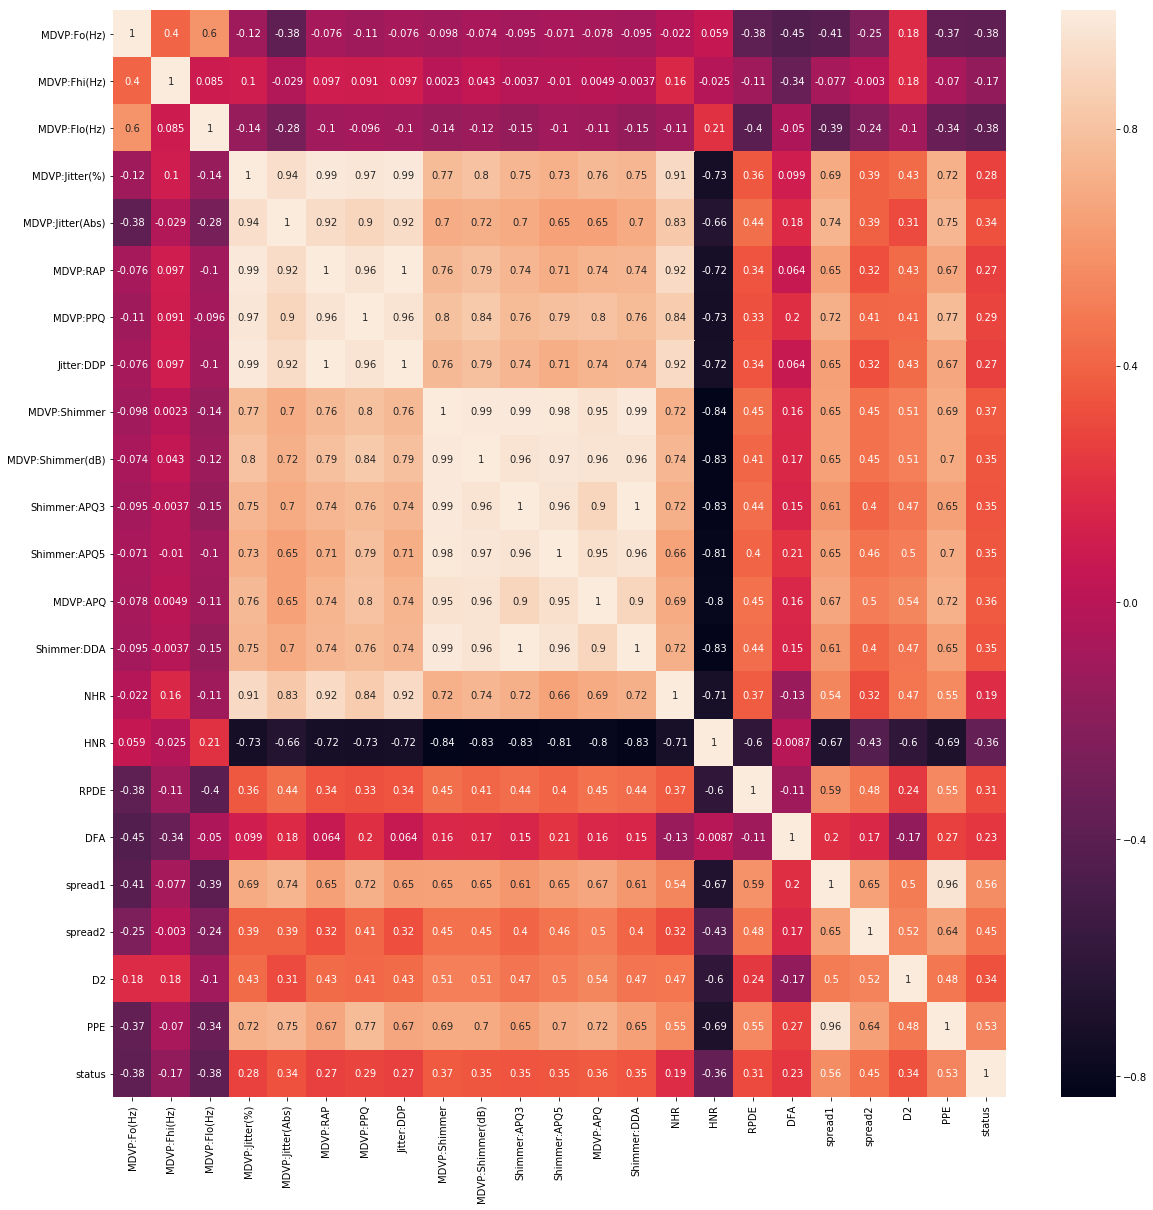

In [18]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr(),annot=True)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
df_new = df
df_new = df_new.astype(float)
def calculate_vif_(X, thresh=100):
    cols = X.columns
    variables = np.arange(X.shape[1])
    dropped=True
    while dropped:
        dropped=False
        c = X[cols[variables]].values
        vif = [variance_inflation_factor(c, ix) for ix in np.arange(c.shape[1])]

        maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('dropping \'' + X[cols[variables]].columns[maxloc] + '\' at index: ' + str(maxloc))
        variables = np.delete(variables, maxloc)
        dropped=True

        print('Remaining variables:')
        print(X.columns[variables])
        return X[cols[variables]]
X2 = calculate_vif_(df_new,5) # Actually running the function

dropping 'Shimmer:APQ3' at index: 10
Remaining variables:
Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE', 'status'],
      dtype='object')


Dropping 'Shimmer:APQ3' at index: 10


In [23]:
X2.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ5', 'MDVP:APQ',
       'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE', 'status'],
      dtype='object')

In [25]:
#Writing a function to calculate the VIF values
import statsmodels.formula.api as sm
df_new = df
df_new = df_new.astype(float)

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

#Calculating VIF values using that function
vif_cal(input_data=df_new, dependent_col="status")

MDVP:Fo(Hz)  VIF =  7.1
MDVP:Fhi(Hz)  VIF =  1.57
MDVP:Flo(Hz)  VIF =  2.22
MDVP:Jitter(%)  VIF =  191.98
MDVP:Jitter(Abs)  VIF =  47.17
MDVP:RAP  VIF =  1394371.17
MDVP:PPQ  VIF =  108.1
Jitter:DDP  VIF =  1395141.42
MDVP:Shimmer  VIF =  759.77
MDVP:Shimmer(dB)  VIF =  99.3
Shimmer:APQ3  VIF =  15086071.34
Shimmer:APQ5  VIF =  106.42
MDVP:APQ  VIF =  61.93
Shimmer:DDA  VIF =  15077980.5
NHR  VIF =  11.65
HNR  VIF =  7.33
RPDE  VIF =  3.79
DFA  VIF =  3.04
spread1  VIF =  20.71
spread2  VIF =  2.89
D2  VIF =  3.48
PPE  VIF =  28.25


In [26]:
X = X2.drop("status" , axis=1)
Y = X2.pop("status")
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.30, random_state=1)

In [27]:
#X_train = Train Set, X_test = train_labels, y_train = test_set, y_test = test_labels
print("Train Set ------->", X_train.shape)
print("Test Set ------->",Y_train.shape)
print('test_labels ------->',Y_test.shape)
print('train_labels ------->', X_test.shape)

Train Set -------> (136, 21)
Test Set -------> (136,)
test_labels -------> (59,)
train_labels -------> (59, 21)


In [28]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer #DT does not take strings as input for the model fit step....
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.219150
MDVP:Fhi(Hz)      0.099800
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.040734
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.106000
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.079409
spread1           0.000000
spread2           0.000000
D2                0.067644
PPE               0.387263


In [30]:
y_predict = dt_model.predict(X_test)

In [31]:
print(dt_model.score(X_train , Y_train))
print(dt_model.score(X_test , Y_test))
print("Accuracy------>",metrics.precision_score(Y_test,y_predict))

1.0
0.864406779661
Accuracy------> 0.847826086957


In [32]:
print(metrics.confusion_matrix(Y_test, y_predict))

[[12  7]
 [ 1 39]]


In [33]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.80328947368421044

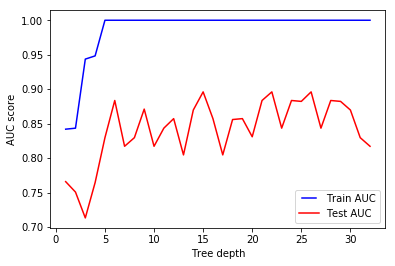

In [34]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dt = DecisionTreeClassifier(max_depth=max_depth)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results , 'b' ,label= "Train AUC" )
line2, = plt.plot(max_depths, test_results, 'r', label= "Test AUC" )
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

In [36]:
# Improve the model (Regularizatin)
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, min_samples_leaf=5 )
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))

                       Imp
MDVP:Fo(Hz)       0.166071
MDVP:Fhi(Hz)      0.165015
MDVP:Flo(Hz)      0.000000
MDVP:Jitter(%)    0.000000
MDVP:Jitter(Abs)  0.000000
MDVP:RAP          0.000000
MDVP:PPQ          0.000000
Jitter:DDP        0.000000
MDVP:Shimmer      0.000000
MDVP:Shimmer(dB)  0.000000
Shimmer:APQ5      0.000000
MDVP:APQ          0.000000
Shimmer:DDA       0.123814
NHR               0.000000
HNR               0.000000
RPDE              0.000000
DFA               0.092755
spread1           0.000000
spread2           0.000000
D2                0.000000
PPE               0.452346


In [38]:
y_predict = dt_model.predict(X_test)


In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_predict)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.88223684210526321

with max_depth around 7 will have best accuracy score. With the increase in depth , the model may overfit.

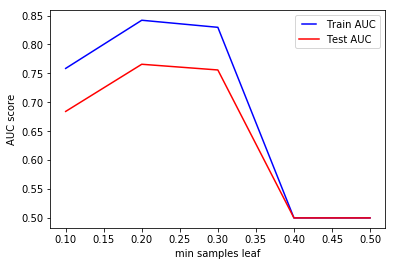

In [40]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dt.fit(X_train, Y_train)
   train_pred = dt.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dt.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

It is evident from the above two graph that the model accuracy varies based on the depth of the tree and min_sample_lleaf values. There are optimal values to predict maximum accuracy and then it may impact the accuracy.
As the value of min_samples_leaf values increases model is becomng overfitting.

Regularization attemts to reduce the variance of the estimator by simplifying it, something that will increase the bias, in such a way that the expected error decreases. A common way to reduce overfitting in a machine learning algorithm is to use a regularization term that penalizes large weights (L2) or non-sparse weights (L1) etc.

# Improve the model (Random Forest)



In [43]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, Y_train)

print("Train Set ------->", X_train.shape)
print("Test Set ------->",Y_train.shape)
print('test_labels ------->',Y_test.shape)
print('train_labels ------->', X_test.shape)

Train Set -------> (136, 21)
Test Set -------> (136,)
test_labels -------> (59,)
train_labels -------> (59, 21)


In [46]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , Y_test))
print(metrics.confusion_matrix(Y_test, y_predict))

0.864406779661
[[12  7]
 [ 1 39]]


In [47]:
#Find optimum number of tree using formula
# ntree = sqrt(number of rows * number of columns) / number of cpus
from math import sqrt
ntree = sqrt(195*23)/4
ntree

16.74253565025322

In [48]:
rfcl = RandomForestClassifier(n_estimators = int(ntree))
rfcl = rfcl.fit(X_train, Y_train)

In [49]:
rfcl.score(X_test , Y_test)

0.81355932203389836

In [50]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(Y_test, y_predict))

[[ 9 10]
 [ 1 39]]
